<a href="https://colab.research.google.com/github/Apratim7py/dlearning/blob/master/Tensorflow/CIFAR100(CNN_practise).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf 
print(tf.__version__)

2.2.0-rc4


In [0]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalMaxPooling2D , Dropout, BatchNormalization,\
Flatten
from tensorflow.keras.models import Model 
from tensorflow.keras.optimizers import Adam
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


In [0]:
(X_train,Y_train) , (X_test,Y_test) = tf.keras.datasets.cifar100.load_data()

# Normalize the pixels 
X_train , X_test = X_train/255.0 , X_test/255.0
Y_test , Y_train = Y_test.flatten() , Y_train.flatten()
print(X_train.shape)
print(Y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [0]:
print(Y_train)

[19 29  0 ...  3  7 73]


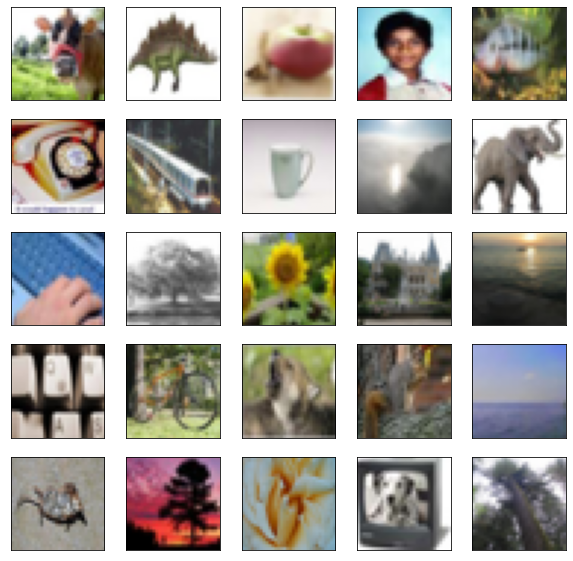

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    #plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [0]:
K = len(set(Y_train))
print(K)

100


In [0]:
# model 
def convModel():
  i = Input(shape=X_train[0].shape)
  x = Conv2D(32 , (3,3) , activation='relu', padding= 'same')(i)
  x = MaxPooling2D((2,2))(x)
  x = BatchNormalization()(x)
  x = Conv2D(64,(3,3),activation='relu', padding= 'same')(x)
  x = MaxPooling2D((2,2))(x)
  x = BatchNormalization()(x)
  x = Conv2D(64,(3,3),activation='relu', padding= 'same')(x)
  x = MaxPooling2D((2,2))(x)
  x = BatchNormalization()(x)
  x = Conv2D(128 , (3,3), activation='relu', padding= 'same')(x)
  x = BatchNormalization()(x)
  x = GlobalMaxPooling2D()(x)
  
  x = Flatten()(x)
  x = Dropout(0.2)(x)
  x = Dense(1024 , activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(1024 , activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(1024 , activation='relu')(x)
  x = Dropout(0.2)(x)
  x = Dense(100, activation='softmax')(x)
  model = Model(i , x)
  return model

In [0]:
model = convModel()
model.compile(optimizer = Adam(0.001),
              loss='sparse_categorical_crossentropy',
              metrics= ['accuracy'])
# train the model 
r = model.fit(X_train,Y_train,
              validation_data = (X_test,Y_test),
              epochs = 50)


Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 3.9233 - accuracy: 0.0886 - val_loss: 3.6811 - val_accuracy: 0.1318
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 3.4556 - accuracy: 0.1579 - val_loss: 3.1530 - val_accuracy: 0.2143
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 3.1435 - accuracy: 0.2175 - val_loss: 3.0451 - val_accuracy: 0.2352
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 2.9146 - accuracy: 0.2563 - val_loss: 2.9420 - val_accuracy: 0.2610
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 2.7634 - accuracy: 0.2894 - val_loss: 2.6805 - val_accuracy: 0.3095
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 2.6324 - accuracy: 0.3127 - val_loss: 2.9008 - val_accuracy: 0.2752
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 2.5326 - accuracy: 0.3339 - val_loss: 2.3740 - val_ac

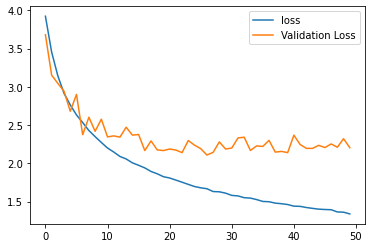

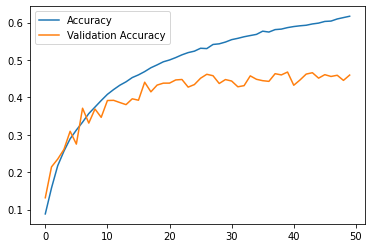

In [0]:
# plotting the loss 
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


# plotting the accuracy
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [0]:
CIFAR100_LABELS_LIST = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

Confusion Matrix, without normalisation
[[82  1  1 ...  0  0  0]
 [ 0 63  0 ...  0  0  0]
 [ 1  0 33 ...  0  7  1]
 ...
 [ 0  0  0 ... 46  1  0]
 [ 0  0  8 ...  0 26  1]
 [ 0  0  0 ...  0  1 58]]


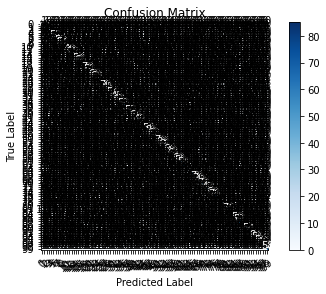

In [0]:
# Plot the confusion matrics 
from sklearn.metrics import confusion_matrix
import itertools 

def plot_confusion_matrix(cm,classes,normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('Normalized Confusion Matrix')
  else:
    print('Confusion Matrix, without normalisation')
  
  print(cm)

  plt.imshow(cm,interpolation = 'nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes,rotation=45)
  plt.yticks(tick_marks, classes)

  fmt= '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, format(cm[i,j],fmt),
             horizontalalignment = 'center',
             color = 'white' if cm[i ,j]>thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(Y_test , p_test)
plot_confusion_matrix(cm,list(range(100)))

In [0]:
# Show misclassified examples 
def misclassified():
  misclassified_examples = np.where(p_test != Y_test)[0]
  i = np.random.choice(misclassified_examples)
  plt.imshow(X_test[i], cmap='gray')
  plt.title(f'True:{CIFAR100_LABELS_LIST[Y_test[i]]} Predicted:{CIFAR100_LABELS_LIST[p_test[i]]}')

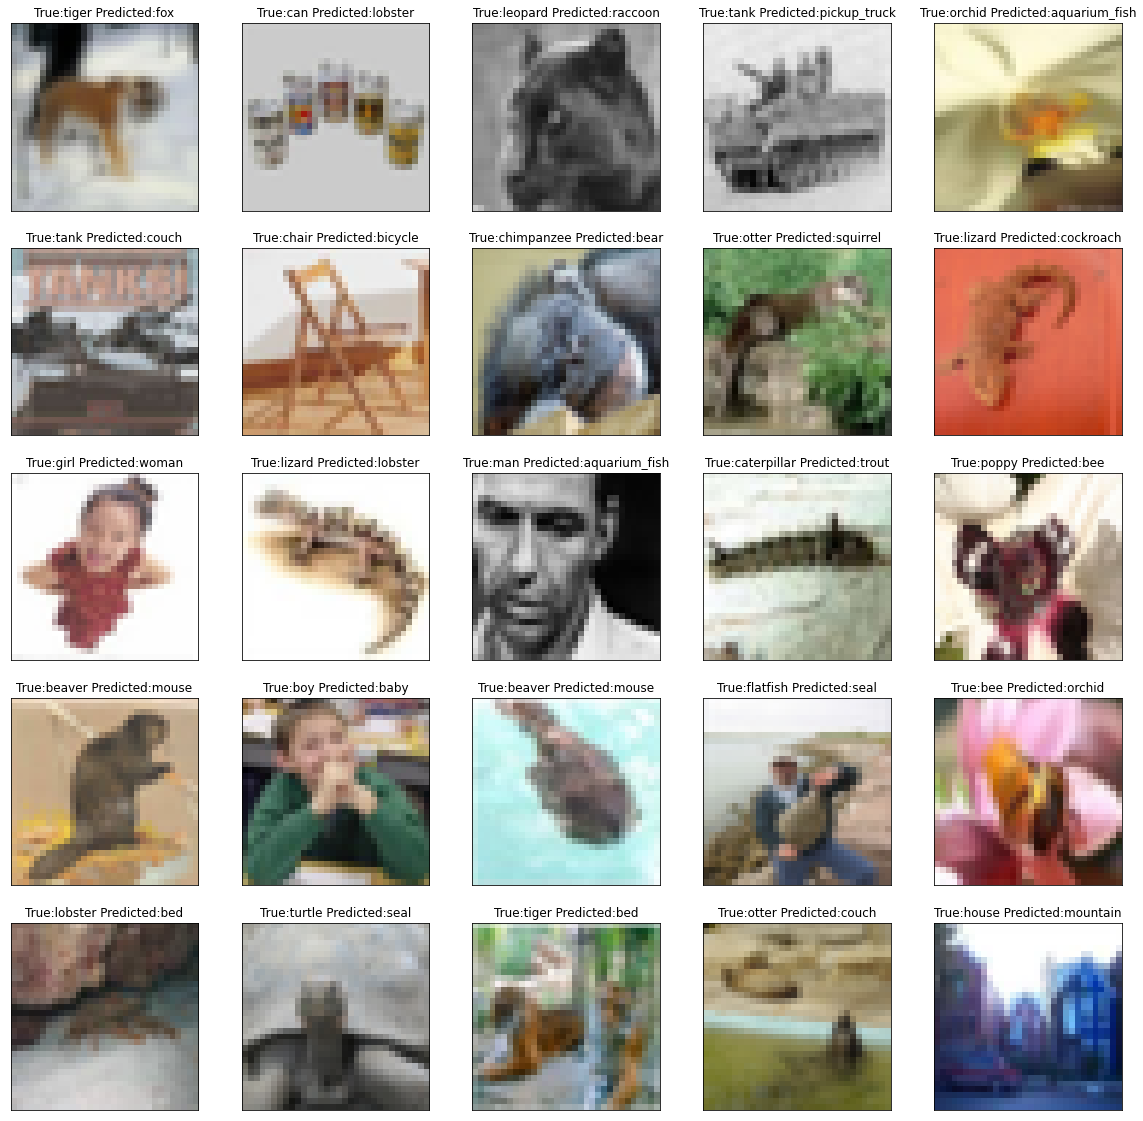

In [0]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    misclassified()
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    #plt.xlabel(class_names[train_labels[i][0]])
plt.show()